## **Load des données et animations** ##



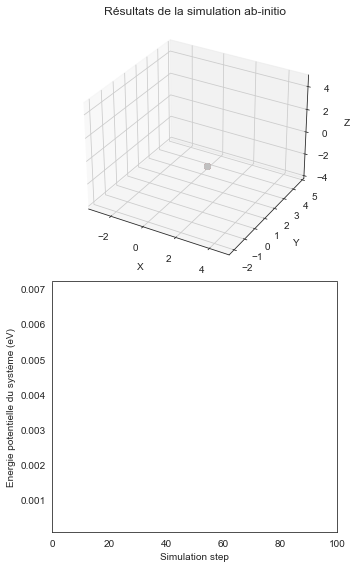

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import pandas as pd

%matplotlib inline 

#Loader du fichier .xyz
def load_data(file):
    o1_index=[2]
    o2_index=[3]
    h1_index=[4]
    h2_index=[5]
    h3_index=[6]
    h4_index=[7]
    h5_index=[8]

    o1=[]
    o2=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    with open(file, 'r') as infile:

        for index, line in enumerate(infile):
            items = line.split()

            if index%9 in o1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o1.append([0,x,y,z])

            if index%9 in o2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o2.append([0,x,y,z])

            if index%9 in h1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h1.append([1,x,y,z])   

            if index%9 in h2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h2.append([1,x,y,z])

            if index%9 in h3_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h3.append([1,x,y,z])

            if index%9 in h4_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h4.append([1,x,y,z])

            if index%9 in h5_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h5.append([1,x,y,z])
                
    return np.concatenate((o1, o2, h1, h2, h3, h4, h5), axis=1).reshape(10000, 7, 4) #10000 fois 7 colomnes de 4 éléments  (particule, x, y, z)

#Loader de l'output de la simulation (fichier .out)
output=pd.read_csv('new_energies_sparse.out', sep=' ', header=None)

#output=pd.read_csv('zundel-1.ener', sep='       ')
#Extraction des énergies (5eme colonne)
energies=output[4]

#energies=output['     Pot.[a.u.]'][0::5]

#Load du fichier .xyz
#dataset=load_data("zundel-pos-1.xyz")
dataset=load_data("new_positions_sparse.xyz")

#################
# Plot des données (Animation 3D + Energie)
#################

#Nombre de data utilisées pour l'animation
N=100

#Init animation 2D
def init():
    return graph,

#Fonction update plot energies
def update_en(num):
    graph.set_data(x[:num],y[:num])
    return graph,

#Mise en forme des trajectoires
def transform_data(X, Y, Z):
    t = np.vstack((X, Y, Z))
    return t

#Fonction update pour le plot des trajectoires
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines

#Fonction update des deux plots
def update_both(num, data2, line2):
    update_en(num)
    update_lines(num, data2, line2)
    
#Création de la figure
fig= plt.figure(figsize=(5, 8))

#ax1 = plot des énergies
ax1=fig.add_subplot(2, 1, 2) 
ax1.set_xlim(0, N)
ax1.set_ylim(np.min(energies), np.max(energies))
ax1.set_xlabel("Simulation step")
ax1.set_ylabel("Energie potentielle du système (eV)")

graph, = plt.plot([], [], '-')

#ax = plot des trajectoires
ax=fig.add_subplot(2, 1, 1, projection='3d')

ax.set_xlim3d([np.min(dataset[:, :, 1][:N]), np.max(dataset[:, :, 1][:N])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(dataset[:, :, 2][:N]), np.max(dataset[:, :, 2][:N])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(dataset[:, :, 3][:N]), np.max(dataset[:, :, 3][:N])])
ax.set_zlabel('Z')

ax.set_title('Résultats de la simulation ab-initio')

plt.tight_layout()

# Données de l'énergie
x = range(N)
y = energies[:N]

# Données 3D
data=[]
lines=[]
colors=['r', 'r', 'silver','silver', 'silver', 'silver', 'silver'] #couleur des atomes
for i in range(dataset.shape[1]):
    coord=dataset[:, i][:N]
    X=coord[:, 1]
    Y=coord[:, 2]
    Z=coord[:, 3]
    data.append(transform_data(X, Y, Z))
    
    lines.append(ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o', color=colors[i])[0])

# Objet d'animation
ani = animation.FuncAnimation(fig, update_both, len(X), fargs=(data, lines),
                              interval=100, blit=False)

# ani.save('ab-initio.mp4')
plt.show()

In [119]:
import mdtraj as mdt
import nglview as nv
nv.show_mdtraj(mdt.load_xyz("new_positions_sparse.xyz", top='zundel.pdb'))

NGLWidget(max_frame=9999)

In [120]:
output

0         1         2         3         4         5         6  \
0     1.0       2.0  0.003692  0.003269  0.000096  0.003174  0.000302   
1     1.0     102.0  0.004527  0.006531  0.002632  0.003899  0.000371   
2     1.0     202.0  0.003945  0.007161  0.002978  0.004182  0.000398   
3     1.0     302.0  0.003904  0.005873  0.002675  0.003198  0.000305   
4     1.0     402.0  0.004485  0.007464  0.003446  0.004018  0.000383   
...   ...       ...       ...       ...       ...       ...       ...   
9995  1.0  999502.0  0.013434  0.006745  0.002987  0.003757  0.000358   
9996  1.0  999602.0  0.012982  0.004565  0.001085  0.003480  0.000331   
9997  1.0  999702.0  0.013049  0.006868  0.003645  0.003222  0.000307   
9998  1.0  999802.0  0.013642  0.006621  0.002572  0.004050  0.000386   
9999  1.0  999902.0  0.013920  0.004813  0.002191  0.002622  0.000250   

               7   8  
0      95.439881 NaN  
1     117.256850 NaN  
2     125.779360 NaN  
3      96.178014 NaN  
4     120.833550 NaN  
...          ...  ..  
9995  112.999770 NaN  
9996  104.660550 NaN  
9997   96.906016 NaN  
9998  121.790850 NaN  
9999   78.868314 NaN  

[10000 rows x 9 columns]

## **Mise en place des descripteurs (matrice de Coulomb)** ##

In [121]:
from ase import Atoms
from dscribe.descriptors import CoulombMatrix

#Fonction pour la création de la matrice de Coulomb à partir d'un dataset
def create_CM(data):
    cm = CoulombMatrix(n_atoms_max=7)
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

## **Séparation et exploration statistique des données**. ##

data shape : (10000, 7, 4)
target shape : (10000,)


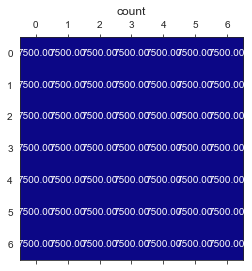

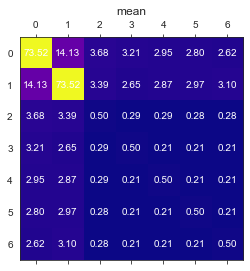

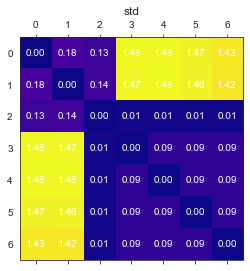

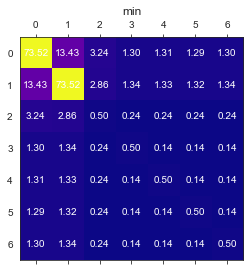

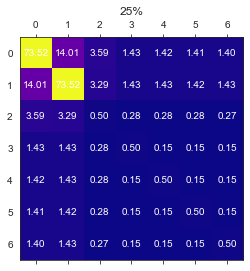

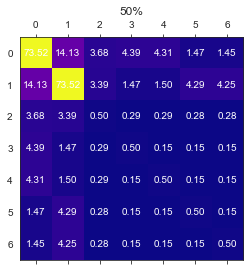

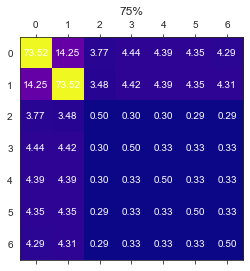

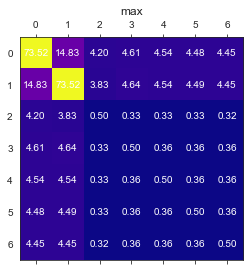

In [122]:
#Séparation des données
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

print("data shape :", dataset.shape)
print("target shape :", energies.shape)
X_train, X_test, y_train, y_test=train_test_split(dataset, energies, random_state=22)

#création des matrices de Coulomb pour les données d'entrainement
X_train_CM=create_CM(X_train)
X_test_CM=create_CM(X_test)

#conversion dans un Dataset pour explorer les données statistiquement avec les outils pandas
X_train_DF=pd.DataFrame(X_train_CM)

stat=X_train_DF.describe()

statnp=stat.to_numpy().reshape(8, 7, 7)

for i, l in enumerate(stat.index):
    #plt.subplot(2, 4, i+1)
    plt.matshow(statnp[i], cmap="plasma")
    for (x, y), value in np.ndenumerate(statnp[i]):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center", color="white")
    plt.title(l)


Text(0.5, 1.0, 'Exemple de matrice de Coulomb')

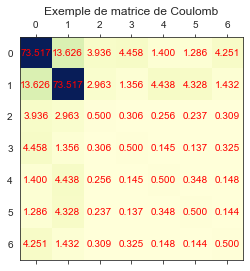

In [127]:
plt.matshow(create_CM(X_train)[0].reshape(7, 7), cmap="YlGnBu")

for (x, y), value in np.ndenumerate(create_CM(X_train)[0].reshape(7, 7)):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center", color="red")
    
plt.title("Exemple de matrice de Coulomb")

Réduction des données


In [131]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_CM_red=scaler.fit_transform(X_train_CM)
X_test_CM_red=scaler.fit_transform(X_test_CM)

#scaling des y
yscaler=StandardScaler()
y_train=yscaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=yscaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### Eigenspectrum ###

In [132]:
def create_CM_eigen(data):
    cm = CoulombMatrix(n_atoms_max=7, permutation='eigenspectrum')
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

In [133]:
pd.DataFrame(create_CM_eigen(X_train)).describe()

0            1            2            3            4  \
count  7500.000000  7500.000000  7500.000000  7500.000000  7500.000000   
mean     88.701505    59.682468     0.417565     0.242826     0.173534   
std       0.183102     0.177838     0.009194     0.006553     0.004729   
min      87.977655    58.979104     0.388062     0.219960     0.157364   
25%      88.582326    59.559842     0.411327     0.238478     0.170198   
50%      88.705274    59.678830     0.417490     0.242890     0.173346   
75%      88.827863    59.797708     0.423616     0.247244     0.176679   
max      89.435804    60.383806     0.453386     0.267795     0.194823   

                 5            6  
count  7500.000000  7500.000000  
mean      0.162842     0.152649  
std       0.004301     0.005124  
min       0.143278     0.131788  
25%       0.159958     0.149336  
50%       0.162958     0.152911  
75%       0.165817     0.156172  
max       0.178765     0.169214

In [134]:
X_train_CMe=create_CM_eigen(X_train)
X_test_CMe=create_CM_eigen(X_test)
X_train_CMe_red=scaler.fit_transform(X_train_CMe)
X_test_CMe_red=scaler.fit_transform(X_test_CMe)

## SOAP ##

In [196]:
from dscribe.descriptors import SOAP
from ase.io import read
from sklearn.decomposition import PCA
from dscribe.kernels import AverageKernel

def SOAP_Vectors(xyz_filename, output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=25,kernel_matrix=False):
    # read the xyz file
    frames = read(xyz_filename, ':')
    n_frames = len(frames)

    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(True)
    global_species = np.unique(global_species)
    print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames,
                                                                                     ele=global_species))

    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,
                average="off")

    # kernel
    soap_vectors = desc.create(frames)
    print(soap_vectors.shape)
    if kernel_matrix :
        print('NOT IMPLEMENTED YET')
#         rel = AverageKernel(metric="linear")
#         kNN = np.array([((features_2d@features_2d.T))** zeta for features_2d in soap_vectors])
#         print("kernel matrix (shape: {}) calculated from vector set of shape {}".format(kNN.shape, soap_vectors.shape))

#         # projection
#         data_2d = np.array([features_2d.flatten() for features_2d in kNN])
#         pca = PCA(n_components=pca_d)
#         pca.fit(data_2d)
#         knn_pca = pca.transform(data_2d)
#         print("original shape:   ", kNN.shape) 
#         print("transformed shape:", knn_pca.shape)
#         return knn_pca,pca
    else :  
        data_2d = np.array([features_2d.flatten() for features_2d in soap_vectors])
        pca = PCA(n_components=pca_d)
        pca.fit(data_2d)
        Soap_pca = pca.transform(data_2d)
#         print("original shape:   ", soap_vectors.shape) 
#         print("transformed shape:", Soap_pca.shape)
        return Soap_pca,pca

def SOAP_Vector(xyz_filename, cutoff=3., n_max=6, l_max=6, zeta=2.0,atom_sigma=0.5,pca):
    # read the xyz file
    frames = read(xyz_filename, ':')
    n_frames = len(frames)

    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(True)
    global_species = np.unique(global_species)
    print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames,
                                                                                     ele=global_species))

    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,
                average="off")

    # kernel
    soap_vectors = desc.create(frames)
    print(soap_vectors.shape)
   
    data_2d = np.array([soap_vectors.flatten()]).reshape(-1, 1)
    print(data_2d.shape)
    Soap_pca = pca.transform(data_2d)
#         print("original shape:   ", soap_vectors.shape) 
#         print("transformed shape:", Soap_pca.shape)
    return Soap_pca,pca



In [197]:
Soap_pca,pca=SOAP_Vector("a.xyz", output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=12)

loaded xyz file: a.xyz, with 1 frames and elements: [1 8]
(7, 546)
(3822, 1)


ValueError: n_components=12 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [136]:
Soap_pca,pca=SOAP_Vectors("new_positions_sparse.xyz", output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=12)

loaded xyz file: new_positions_sparse.xyz, with 10000 frames and elements: [1 8]
original shape:    (10000, 7, 546)
transformed shape: (10000, 12)


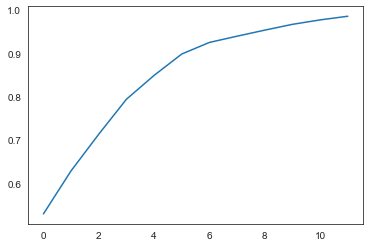

In [137]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

X_train_soap, X_test_soap, y_train, y_test=train_test_split(Soap_pca, energies, random_state=22)

X_train_soap_red=scaler.fit_transform(X_train_soap)
X_test_soap_red=scaler.fit_transform(X_test_soap)

yscaler=StandardScaler()
y_train=yscaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=yscaler.fit_transform(y_test.to_numpy().reshape(-1, 1))


## PIV Vector ##

In [ ]:
from scipy.spatial import distance

def C(rmin, rmax, x): 
    a=20/(rmax-rmin)

    norm=a*x+10-a*rmax
    y=1/(np.exp(0.3*norm)+1)
    return y

def PIV_descr(X, pca_d=10, label='label'):
    piv=[]
    for i in range(len(X)):
        dist=distance.cdist(X[i][:, 1:], X[i][:, 1:], 'euclidean')
        
        a=np.array([dist[0, 1]])
        b=np.concatenate((dist[0, 2:],dist[1, 2:]))
        c=[]
        for i in range(2, dist.shape[0]):
            c=np.concatenate((c, dist[i, i+1:]))

        
        brmin=np.min(b)
        brmax=np.max(b)
        
        crmin=np.min(c)
        crmax=np.max(c)
        
        aswitched=C(brmin, brmax, a)
        bswitched=C(brmin, brmax, b)
        cswitched=C(crmin, crmax, c)
        
        bs=np.sort(bswitched)
        cs=np.sort(cswitched)
        
        piv.append(np.concatenate((aswitched, bs, cs)))
        
    data_2d = np.array([features_2d.flatten() for features_2d in piv])
    pca = PCA(n_components=pca_d)
    pca.fit(data_2d)
    piv_pca = pca.transform(data_2d)
    print("original shape:   ", piv_pca.shape) 
    print("transformed shape:", piv_pca.shape)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o', label=label)
    plt.xlabel("Nombre de composantes")
    plt.ylabel('Variance totale expliquée')
    return piv_pca

In [ ]:
X_train_PIV=PIV_descr(X_train, label="données d'entraînement")
X_train_PIV_red=scaler.fit_transform(X_train_PIV)
X_test_PIV=PIV_descr(X_test, label="données de test")
X_test_PIV_red=scaler.fit_transform(X_test_PIV)
plt.legend()

In [64]:
X_train[0]

array([[ 0.        ,  5.05612005,  7.08582041, 22.28660614],
       [ 0.        ,  6.53487141, 11.3107101 , 23.70898172],
       [ 1.        ,  5.66622207,  8.99414067, 22.62807906],
       [ 1.        ,  8.12532504, 11.33833448, 24.55664493],
       [ 1.        ,  6.13741823, 13.0982702 , 23.45653758],
       [ 1.        ,  3.36539933,  6.75775138, 23.0454995 ],
       [ 1.        ,  5.22152935,  6.46147891, 20.61238163]])

In [42]:
X_train[0][:, 1:][0]

array([ 5.05612005,  7.08582041, 22.28660614])

In [61]:
np.sqrt(np.sum((X_train[0][:, 1:][1]-X_train[0][:, 1:][0])**2))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [70]:
len(X_train)

7500

In [71]:
X_train.shape

(7500, 7, 4)

In [69]:
X_train[0]

array([[ 0.        ,  5.05612005,  7.08582041, 22.28660614],
       [ 0.        ,  6.53487141, 11.3107101 , 23.70898172],
       [ 1.        ,  5.66622207,  8.99414067, 22.62807906],
       [ 1.        ,  8.12532504, 11.33833448, 24.55664493],
       [ 1.        ,  6.13741823, 13.0982702 , 23.45653758],
       [ 1.        ,  3.36539933,  6.75775138, 23.0454995 ],
       [ 1.        ,  5.22152935,  6.46147891, 20.61238163]])

In [59]:
test=np.array([[1, 1, 1],[0, 0, 0]])

[[0.         4.6967596  2.03236671 5.71462784 6.21992748 1.88204277
  1.79448886]
 [4.6967596  0.         2.69988818 1.80245354 1.84853136 5.58705603
  5.90159662]
 [2.03236671 2.69988818 0.         3.90663517 4.21334173 3.23565483
  3.26728685]
 [5.71462784 1.80245354 3.90663517 0.         2.8739143  6.77659168
  6.9117988 ]
 [6.21992748 1.84853136 4.21334173 2.8739143  0.         6.93218724
  7.27839777]
 [1.88204277 5.58705603 3.23565483 6.77659168 6.93218724 0.
  3.07458267]
 [1.79448886 5.90159662 3.26728685 6.9117988  7.27839777 3.07458267
  0.        ]]
[[0.         4.53827716 2.19440388 5.5141779  5.7828883  1.82664179
  1.79332594]
 [4.53827716 0.         2.37020758 1.78536801 1.80582806 5.7623217
  5.52619687]
 [2.19440388 2.37020758 0.         3.5498176  3.63223963 3.45534695
  3.39856751]
 [5.5141779  1.78536801 3.5498176  0.         2.91159479 6.67657321
  6.71020277]
 [5.7828883  1.80582806 3.63223963 2.91159479 0.         6.72415279
  6.69880257]
 [1.82664179 5.7623217  

[[0.         4.4458239  2.07070922 5.544692   5.75936327 1.84163752
  1.82227857]
 [4.4458239  0.         2.3916958  1.86980499 1.81098491 5.71572092
  5.54286546]
 [2.07070922 2.3916958  0.         3.71909494 3.72822195 3.41917997
  3.35737749]
 [5.544692   1.86980499 3.71909494 0.         2.98428839 6.89430611
  6.62652405]
 [5.75936327 1.81098491 3.72822195 2.98428839 0.         6.71143264
  6.91467777]
 [1.84163752 5.71572092 3.41917997 6.89430611 6.71143264 0.
  2.9876318 ]
 [1.82227857 5.54286546 3.35737749 6.62652405 6.91467777 2.9876318
  0.        ]]
[[0.         4.4509842  2.34788446 5.60493019 5.4651055  1.86563679
  1.87437296]
 [4.4509842  0.         2.11365336 1.83149764 1.79901776 5.64830939
  5.79549129]
 [2.34788446 2.11365336 0.         3.35378333 3.36246915 3.62790297
  3.82526413]
 [5.60493019 1.83149764 3.35378333 0.         2.939393   6.4200383
  7.06077312]
 [5.4651055  1.79901776 3.36246915 2.939393   0.         6.635703
  6.82948195]
 [1.86563679 5.64830939 3.6

[[0.         4.66183869 2.06805448 5.84910357 5.80397245 1.85803771
  1.85476181]
 [4.66183869 0.         2.59542768 1.82772674 1.84520312 5.71635556
  5.61531677]
 [2.06805448 2.59542768 0.         3.87526468 3.86481696 3.30746325
  3.27822437]
 [5.84910357 1.82772674 3.87526468 0.         2.96397987 6.88221619
  6.99426036]
 [5.80397245 1.84520312 3.86481696 2.96397987 0.         6.49910718
  6.66602427]
 [1.85803771 5.71635556 3.30746325 6.88221619 6.49910718 0.
  3.09399319]
 [1.85476181 5.61531677 3.27822437 6.99426036 6.66602427 3.09399319
  0.        ]]
[[0.         4.41823643 2.1945233  5.75417171 5.48556395 1.85590927
  1.82016768]
 [4.41823643 0.         2.23346287 1.83036664 1.83296353 5.67083398
  5.29068096]
 [2.1945233  2.23346287 0.         3.63692001 3.47868469 3.51678327
  3.33637741]
 [5.75417171 1.83036664 3.63692001 0.         2.98938535 6.70242312
  6.6387783 ]
 [5.48556395 1.83296353 3.47868469 2.98938535 0.         6.79534517
  6.39565871]
 [1.85590927 5.67083398

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



original shape:    (7500, 10)
transformed shape: (7500, 10)


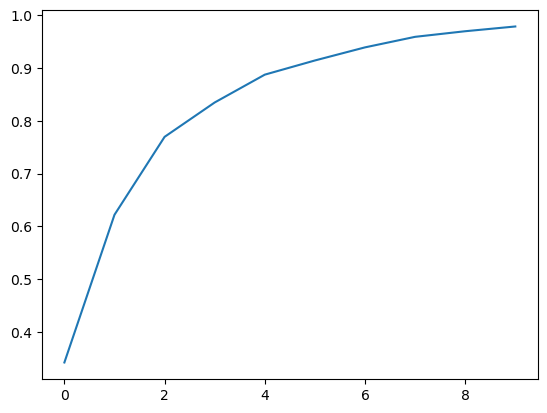

In [72]:
X_train_PIV=PIV_descr(X_train)

In [74]:
np.sqrt(np.sum((X_train[0][:, 1:][2]-X_train[0][:, 1:][1])**2))

2.699888175515429

## **Prédicteur naif** ##

In [77]:
from sklearn.metrics import mean_squared_error

def naive_predictor(xtrain, ytrain):
    return np.ones((xtrain.shape[0],))*ytrain.mean()

y_fit=naive_predictor(X_train, y_train)
y_pred_test=naive_predictor(X_test,y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


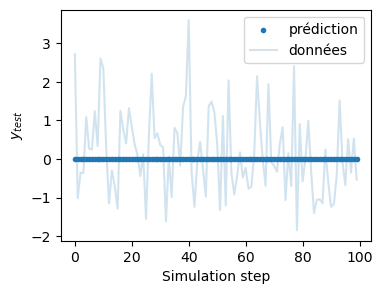

In [78]:
fig=plt.figure(figsize=(4,3))
plt.scatter(np.arange(0, len(y_train[:100])),y_fit[:100], marker='.', label="prédiction")
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2, label='données')
plt.xlabel('Simulation step')
plt.ylabel('$y_{test}$')
plt.legend()

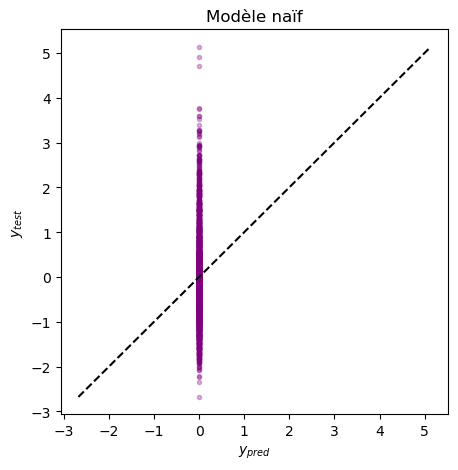

In [79]:
fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
xmin, xmax=plt.xlim()
ymin, ymax=plt.ylim()
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Modèle naïf")

plt.show()

In [80]:
y_fit=naive_predictor(X_train_PIV_red, y_train)
y_pred_test=naive_predictor(X_test_PIV_red, y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


## **Modèle linéaire** ##

In [81]:
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_CMe_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852113
0.7564859632710091


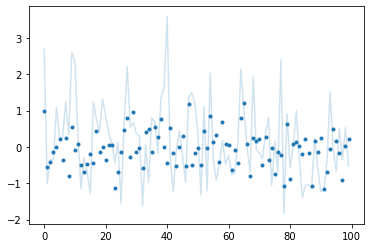

In [29]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_train_CMe_red[:100]), marker='.')
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2)

In [82]:
#PIV
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_PIV_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_PIV_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 31.009266359319234
RMSE moyen: 0.7326136001125692
0.736698723424327


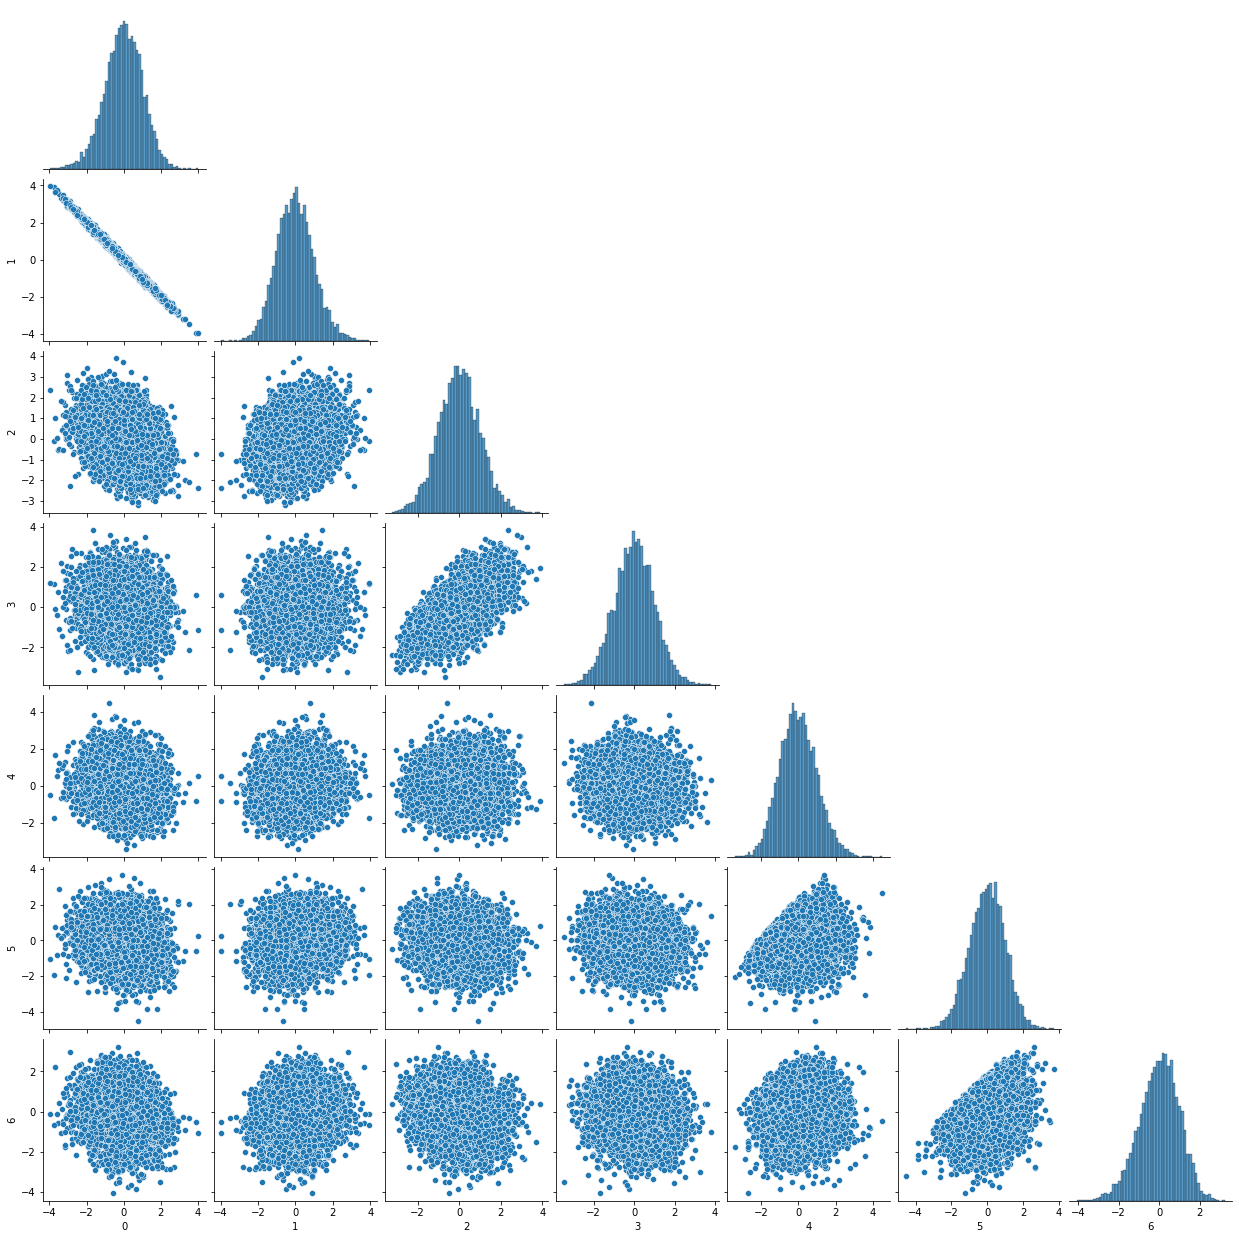

In [31]:
import seaborn as sns

sns.pairplot(pd.DataFrame(X_train_CMe_red), corner=True)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

mse_list=[]
mse_test_list=[]
for d in range(1,5):
    poly=PolynomialFeatures(degree=d)
    Zmodif=poly.fit_transform(X_train_CMe_red)
    Zmodif_test=poly.fit_transform(X_test_CMe_red)

    a=np.logspace(-10, 10, 1000)
    model=RidgeCV(alphas=a)
    model.fit(Zmodif, y_train)

    print("Best regularization parameter :", model.alpha_)
    print("RMSE moyen:", -model.best_score_)

    y_pred_test_rcv=model.predict(Zmodif_test)
    mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
    print(mse_test_rcv)
    mse_list.append(-model.best_score_)
    mse_test_list.append(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852113
0.7564859632710083
Best regularization parameter : 14.162866162991973
RMSE moyen: 0.5399559357654161
0.5213666113616616
Best regularization parameter : 17.030650292528428
RMSE moyen: 0.5402247037401428
0.5217424378170666
Best regularization parameter : 42.818517986524064
RMSE moyen: 0.5518063896545434
0.5342317688277887


Text(0.5, 0, 'Dimension du polynome')

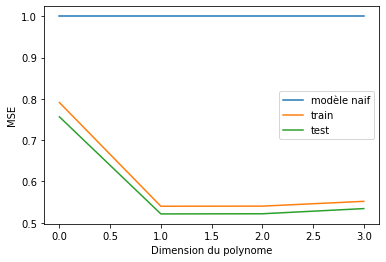

In [33]:
plt.plot([1]*len(mse_list), label='modèle naif')
plt.plot(mse_list, label="train")
plt.plot(mse_test_list, label='test')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Dimension du polynome")

In [34]:
y_pred=model.predict(Zmodif_test)

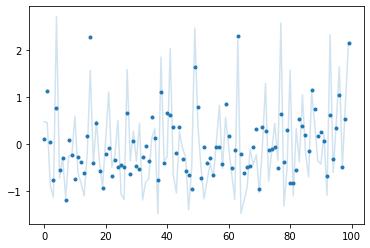

In [35]:
plt.scatter(np.arange(0, len(y_test[:100])),y_pred[:100], marker='.')
plt.plot(np.arange(0, len(y_test[:100])), y_test[:100], alpha=0.2)

In [36]:
from sklearn.linear_model import ElasticNetCV

a=np.logspace(-10, 10)
model=ElasticNetCV(alphas=a, max_iter=1000000)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
#print("RMSE moyen:", -model.best_score_)

y_pred_train_en=model.predict(X_train_CMe_red)
mse_train_en=mean_squared_error(np.array(y_train), y_pred_train_en)
print(mse_train_en)


y_pred_test_en=model.predict(X_test_CMe_red)
mse_test_en=mean_squared_error(np.array(y_test), y_pred_test_en)
print(mse_test_en)

Best regularization parameter : 0.000339322177189533
0.7893650565523528
0.7564322245105621


C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Kernel Ridge Regression - Recherche sur grille ##

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [45]:
#plt.semilogx(A, mse_test_krr, marker='o', linestyle='--', color='black')
#plt.xlabel("log(Regul. paramater)")
#plt.ylabel("MSE")
#plt.grid(True, which="both", ls="-")
#plt.show()
#print("Best score KRR :", np.min(mse_test_krr))
#idx=np.where(np.array(mse_test_krr)==np.min(mse_test_krr))
#print("Best param KRR :", A[idx])

### SOAP ###

In [84]:
krrsoap = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-11.5, -10.5,4),
                                                                          "gamma": np.logspace(-7,-5,6)})
krrsoap.fit(X_train_soap_red, y_train)

y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)

mse_test_soap=mean_squared_error(np.array(y_test), y_pred_test_krr_soap)
b_params_soap=krrsoap.best_params_
print(mse_test_soap)
print(b_params_soap)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.24162e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.09026e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.10611e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.7371e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.13639e-1

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.79667e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.9313e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.25587e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.24118e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.18548e-1

0.23914669496495972
{'alpha': 1.4677992676220676e-11, 'gamma': 1e-05}


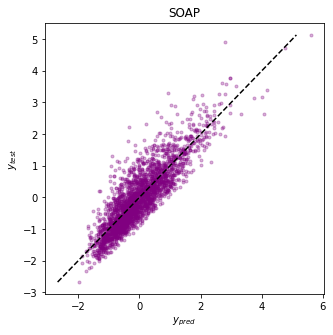

(2500, 12)


In [91]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)
plt.scatter(y_pred_test_krr_soap,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("SOAP")
plt.show()

print(X_test_soap_red.shape)

### Coulomb Matrix ###

In [67]:
krrcm = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-11, -10,4),
                                                                          "gamma": np.logspace(-5, -3,4)})
krrcm.fit(X_train_CM_red, y_train)

y_pred_test_krr_cm=krrcm.predict(X_test_CM_red)

mse_test_cm=mean_squared_error(np.array(y_test), y_pred_test_krr_cm)
b_params_cm=krrcm.best_params_
print(mse_test_cm)
print(b_params_cm)

C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.08106e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09593e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09094e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.06055e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zacharie\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.88952e-

0.9167550999982191
{'alpha': 4.641588833612773e-11, 'gamma': 0.001}


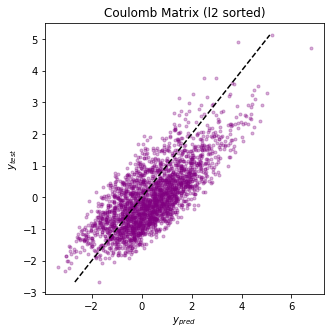

(7500, 49)


In [92]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_cm=krrcm.predict(X_test_CM_red)
plt.scatter(y_pred_test_krr_cm,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.title("Coulomb Matrix (l2 sorted)")
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.show()
print(X_train_CM_red.shape)

### Coulomb Matrix Eigenvalues ###

In [141]:
krrcmeig = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-10, -9,4),
                                                                          "gamma": np.logspace(-5, -4,4)})
krrcmeig.fit(X_train_CMe_red, y_train)

y_pred_test_krr_cmeig=krrcmeig.predict(X_test_CMe_red)

mse_test_cmeig=mean_squared_error(np.array(y_test), y_pred_test_krr_cmeig)
b_params_cmeig=krrcmeig.best_params_
print(mse_test_cmeig)
print(b_params_cmeig)

0.5208119458707361
{'alpha': 2.1544346900318867e-10, 'gamma': 1e-05}


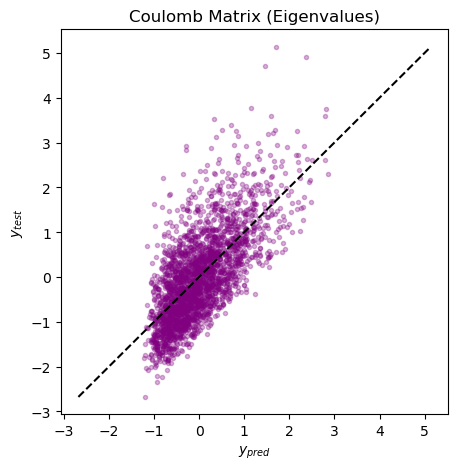

(7500, 7)


In [145]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_cmeig=krrcmeig.predict(X_test_CMe_red)
plt.scatter(y_pred_test_krr_cmeig,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Coulomb Matrix (Eigenvalues)")
plt.show()
print(X_train_CMe_red.shape)

### PIV ###

In [93]:
krrPIV = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-13, -10,4),
                                                                          "gamma": np.logspace(-7, -5, 4)})
krrPIV.fit(X_train_PIV_red, y_train)

y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV_red)

mse_test_PIV=mean_squared_error(np.array(y_test), y_pred_test_krr_PIV)
b_params_PIV=krrPIV.best_params_
print(mse_test_PIV)
print(b_params_PIV)

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.50105e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=7.49899e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=8.8057e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=7.57119e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=Fals

0.5843809304285971
{'alpha': 1e-10, 'gamma': 1e-05}


0.5843815079695335


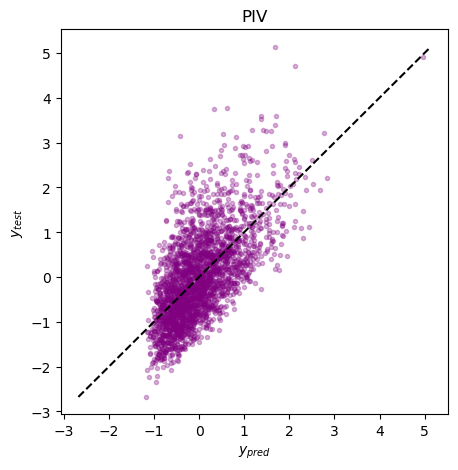

(7500, 10)


In [144]:
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV_red)
plt.scatter(y_pred_test_krr_PIV,  y_test, marker='.', color='purple',alpha=0.3)
mse_test_PIV=mean_squared_error(np.array(y_test), y_pred_test_krr_PIV)
print(mse_test_PIV)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("PIV")
plt.show()
print(X_train_PIV_red.shape)

### Comparaison CM/PIV ###

In [182]:
def random(dataset, energies, PIV, CMeig, N):
    idx=np.random.randint(len(dataset), size=N)
    y_pred_PIV=krrPIV.predict(PIV[idx])
    y_pred_cmeig=krrcmeig.predict(CMeig[idx])
    
    return energies[idx], y_pred_PIV, y_pred_cmeig
    
ysample, PIVsample, CMeigsample = random(X_test, y_test, X_test_PIV_red, X_test_CMe_red, 15)

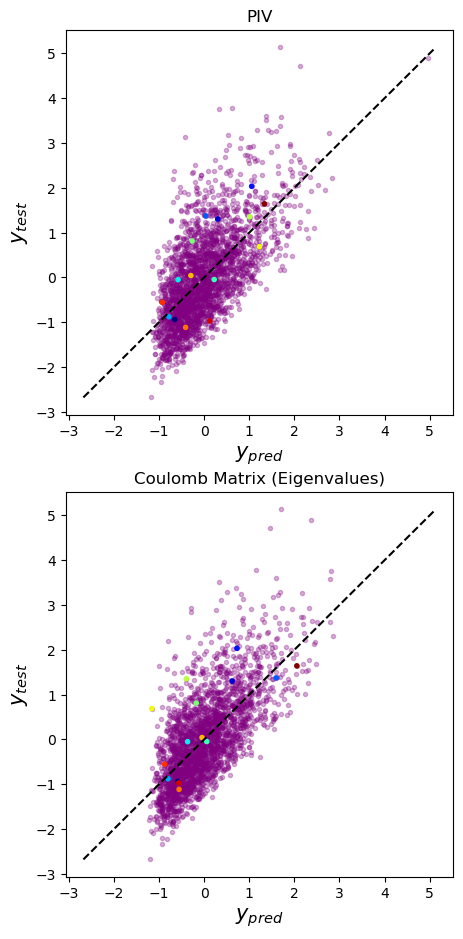

In [186]:

fig=plt.figure(figsize=(5,11))
plt.subplot(2, 1, 1)
plt.xlabel('$y_{pred}$', fontsize=15)
plt.ylabel('$y_{test}$', fontsize=15)
colors = plt.cm.jet(np.linspace(0, 1, len(ysample)))
plt.scatter(y_pred_test_krr_PIV,  y_test, marker='.', color='purple',alpha=0.3)
plt.scatter(PIVsample, ysample, marker='.', color=colors,alpha=1)
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("PIV")

plt.subplot(2, 1, 2)
plt.scatter(y_pred_test_krr_cmeig,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$', fontsize=15)
plt.ylabel('$y_{test}$', fontsize=15)
plt.scatter(CMeigsample, ysample, marker='.', color=colors,alpha=1)
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Coulomb Matrix (Eigenvalues)")
plt.show()

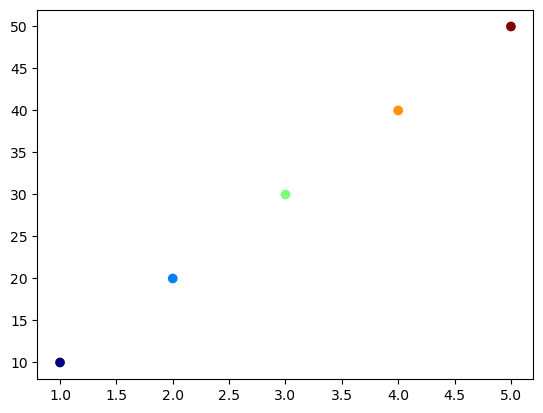

In [159]:
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

# Create a colormap for N points
colors = plt.cm.jet(np.linspace(0, 1, len(x)))

# Plot the data using the colormap
plt.scatter(x, y, c=colors)


## **Réseau de neurones** ##

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                195       
                                                                 
 dense_4 (Dense)             (None, 12)                192       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 4ms/step - loss: 1.0755 - mean_squared_error: 1.0755 - val_loss: 0.8700 - val_mean_squared_error: 0.8700
Epoch 2/300
94/94 [==============================] - 0s 2ms/step - loss: 0.9059 - mean_squared_error: 0.9059 - val_loss: 0.8367 - val_mean_squared_error: 0.836

94/94 [==============================] - 0s 3ms/step - loss: 0.3333 - mean_squared_error: 0.3333 - val_loss: 0.3743 - val_mean_squared_error: 0.3743
Epoch 47/300
94/94 [==============================] - 0s 3ms/step - loss: 0.3317 - mean_squared_error: 0.3317 - val_loss: 0.3761 - val_mean_squared_error: 0.3761
Epoch 48/300
94/94 [==============================] - 0s 3ms/step - loss: 0.3309 - mean_squared_error: 0.3309 - val_loss: 0.3740 - val_mean_squared_error: 0.3740
Epoch 49/300
94/94 [==============================] - 0s 3ms/step - loss: 0.3305 - mean_squared_error: 0.3305 - val_loss: 0.3715 - val_mean_squared_error: 0.3715
Epoch 50/300
94/94 [==============================] - 0s 3ms/step - loss: 0.3280 - mean_squared_error: 0.3280 - val_loss: 0.3705 - val_mean_squared_error: 0.3705
Epoch 51/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3271 - mean_squared_error: 0.3271 - val_loss: 0.3666 - val_mean_squared_error: 0.3666
Epoch 52/300
94/94 [=====================

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2995 - mean_squared_error: 0.2995 - val_loss: 0.3452 - val_mean_squared_error: 0.3452
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3002 - mean_squared_error: 0.3002 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2981 - mean_squared_error: 0.2981 - val_loss: 0.3511 - val_mean_squared_error: 0.3511
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3001 - mean_squared_error: 0.3001 - val_loss: 0.3520 - val_mean_squared_error: 0.3520
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3023 - mean_squared_error: 0.3023 - val_loss: 0.3434 - val_mean_squared_error: 0.3434
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2988 - mean_squared_error: 0.2988 - val_loss: 0.3436 - val_mean_squared_error: 0.3436
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.2930 - mean_squared_error: 0.2930 - val_loss: 0.3362 - val_mean_squared_error: 0.3362
Epoch 148/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2926 - mean_squared_error: 0.2926 - val_loss: 0.3388 - val_mean_squared_error: 0.3388
Epoch 149/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2928 - mean_squared_error: 0.2928 - val_loss: 0.3375 - val_mean_squared_error: 0.3375
Epoch 150/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2922 - mean_squared_error: 0.2922 - val_loss: 0.3353 - val_mean_squared_error: 0.3353
Epoch 151/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2907 - mean_squared_error: 0.2907 - val_loss: 0.3396 - val_mean_squared_error: 0.3396
Epoch 152/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2899 - mean_squared_error: 0.2899 - val_loss: 0.3347 - val_mean_squared_error: 0.3347
Epoch 153/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2874 - mean_squared_error: 0.2874 - val_loss: 0.3457 - val_mean_squared_error: 0.3457
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2884 - mean_squared_error: 0.2884 - val_loss: 0.3416 - val_mean_squared_error: 0.3416
Epoch 199/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2866 - mean_squared_error: 0.2866 - val_loss: 0.3314 - val_mean_squared_error: 0.3314
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2855 - mean_squared_error: 0.2855 - val_loss: 0.3320 - val_mean_squared_error: 0.3320
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2878 - mean_squared_error: 0.2878 - val_loss: 0.3377 - val_mean_squared_error: 0.3377
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2875 - mean_squared_error: 0.2875 - val_loss: 0.3376 - val_mean_squared_error: 0.3376
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2837 - mean_squared_error: 0.2837 - val_loss: 0.3340 - val_mean_squared_error: 0.3340
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2828 - mean_squared_error: 0.2828 - val_loss: 0.3379 - val_mean_squared_error: 0.3379
Epoch 249/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2841 - mean_squared_error: 0.2841 - val_loss: 0.3326 - val_mean_squared_error: 0.3326
Epoch 250/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2856 - mean_squared_error: 0.2856 - val_loss: 0.3313 - val_mean_squared_error: 0.3313
Epoch 251/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2843 - mean_squared_error: 0.2843 - val_loss: 0.3402 - val_mean_squared_error: 0.3402
Epoch 252/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2835 - mean_squared_error: 0.2835 - val_loss: 0.3356 - val_mean_squared_error: 0.3356
Epoch 253/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.2835 - mean_squared_error: 0.2835 - val_loss: 0.3301 - val_mean_squared_error: 0.3301
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2825 - mean_squared_error: 0.2825 - val_loss: 0.3247 - val_mean_squared_error: 0.3247
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2822 - mean_squared_error: 0.2822 - val_loss: 0.3249 - val_mean_squared_error: 0.3249
Epoch 300/300
94/94 [==============================] - 0s 2ms/step - loss: 0.2838 - mean_squared_error: 0.2838 - val_loss: 0.3297 - val_mean_squared_error: 0.3297


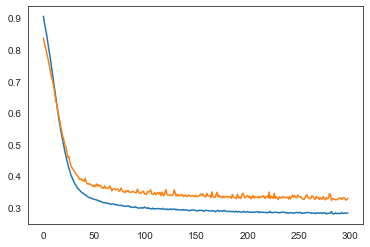

In [116]:
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf


X_soap_red=X_train_soap_red
y_soap=y_train

model=Sequential()
model.add(Dense(units=15, activation='tanh', input_shape=(12,)))
model.add(Dense(units=12, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])


Hist=model.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist.history['loss'][1:])
plt.plot(Hist.history['val_loss'][1:])



#model.predict(X_train_CM_red)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 15)                195       
                                                                 
 dense_67 (Dense)            (None, 12)                192       
                                                                 
 dense_68 (Dense)            (None, 1)                 13        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 1.4302 - mean_squared_error: 0.9710 - val_loss: 1.2388 - val_mean_squared_error: 0.8535
Epoch 2/300
94/94 [==============================] - 0s 1ms/step - loss: 1.2261 - mean_squared_error: 0.8997 - val_loss: 1.1038 - val_mean_squared_error: 0.83

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3957 - mean_squared_error: 0.3389 - val_loss: 0.4096 - val_mean_squared_error: 0.3528
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3937 - mean_squared_error: 0.3371 - val_loss: 0.4225 - val_mean_squared_error: 0.3660
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3953 - mean_squared_error: 0.3388 - val_loss: 0.4213 - val_mean_squared_error: 0.3649
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3922 - mean_squared_error: 0.3360 - val_loss: 0.4309 - val_mean_squared_error: 0.3748
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3930 - mean_squared_error: 0.3371 - val_loss: 0.4236 - val_mean_squared_error: 0.3678
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3890 - mean_squared_error: 0.3334 - val_loss: 0.4121 - val_mean_squared_error: 0.3566
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.3633 - mean_squared_error: 0.3207 - val_loss: 0.3799 - val_mean_squared_error: 0.3372
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3610 - mean_squared_error: 0.3182 - val_loss: 0.3785 - val_mean_squared_error: 0.3359
Epoch 199/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3643 - mean_squared_error: 0.3218 - val_loss: 0.3884 - val_mean_squared_error: 0.3459
Epoch 200/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3626 - mean_squared_error: 0.3202 - val_loss: 0.3955 - val_mean_squared_error: 0.3531
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3672 - mean_squared_error: 0.3250 - val_loss: 0.3868 - val_mean_squared_error: 0.3444
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3613 - mean_squared_error: 0.3188 - val_loss: 0.3950 - val_mean_squared_error: 0.3527
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.3555 - mean_squared_error: 0.3157 - val_loss: 0.3891 - val_mean_squared_error: 0.3492
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3593 - mean_squared_error: 0.3195 - val_loss: 0.3762 - val_mean_squared_error: 0.3366
Epoch 299/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3540 - mean_squared_error: 0.3143 - val_loss: 0.3833 - val_mean_squared_error: 0.3434
Epoch 300/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3560 - mean_squared_error: 0.3162 - val_loss: 0.3781 - val_mean_squared_error: 0.3385


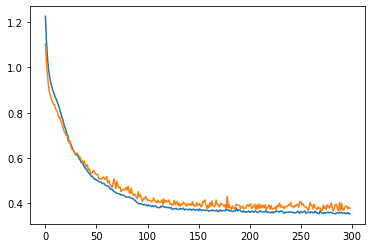

In [170]:
model_reg=Sequential()
model_reg.add(Dense(units=15, activation='tanh', input_shape=(12,), kernel_regularizer=regularizers.l2(0.0)))

model_reg.add(Dense(units=12, activation='tanh'))
model_reg.add(Dense(units=1))
model_reg.summary()

model_reg.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_reg=model_reg.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_reg.history['loss'][1:])
plt.plot(Hist_reg.history['val_loss'][1:])



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 15)                195       
                                                                 
 dense_70 (Dense)            (None, 12)                192       
                                                                 
 dense_71 (Dense)            (None, 1)                 13        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 1.5935 - mean_squared_error: 1.0524 - val_loss: 1.3293 - val_mean_squared_error: 0.8791
Epoch 2/300
94/94 [==============================] - 0s 1ms/step - loss: 1.2895 - mean_squared_error: 0.9148 - val_loss: 1.1438 - val_mean_squared_error: 0.83

Epoch 97/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_squared_error: 0.3706 - val_loss: 0.4437 - val_mean_squared_error: 0.3940
Epoch 98/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4207 - mean_squared_error: 0.3710 - val_loss: 0.4425 - val_mean_squared_error: 0.3931
Epoch 99/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_squared_error: 0.3713 - val_loss: 0.4497 - val_mean_squared_error: 0.4003
Epoch 100/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4214 - mean_squared_error: 0.3721 - val_loss: 0.4519 - val_mean_squared_error: 0.4026
Epoch 101/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4205 - mean_squared_error: 0.3715 - val_loss: 0.4414 - val_mean_squared_error: 0.3923
Epoch 102/300
94/94 [==============================] - 0s 2ms/step - loss: 0.4187 - mean_squared_error: 0.3700 - val_loss: 0.4314 - val_mean_squared_error: 0.3827
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 2ms/step - loss: 0.3522 - mean_squared_error: 0.3102 - val_loss: 0.3730 - val_mean_squared_error: 0.3311
Epoch 198/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3517 - mean_squared_error: 0.3098 - val_loss: 0.3858 - val_mean_squared_error: 0.3440
Epoch 199/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3489 - mean_squared_error: 0.3071 - val_loss: 0.3713 - val_mean_squared_error: 0.3293
Epoch 200/300
94/94 [==============================] - 0s 1ms/step - loss: 0.3522 - mean_squared_error: 0.3102 - val_loss: 0.3682 - val_mean_squared_error: 0.3261
Epoch 201/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3508 - mean_squared_error: 0.3089 - val_loss: 0.3656 - val_mean_squared_error: 0.3239
Epoch 202/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3492 - mean_squared_error: 0.3075 - val_loss: 0.3700 - val_mean_squared_error: 0.3280
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 2ms/step - loss: 0.3423 - mean_squared_error: 0.3053 - val_loss: 0.3637 - val_mean_squared_error: 0.3267
Epoch 298/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3392 - mean_squared_error: 0.3024 - val_loss: 0.3634 - val_mean_squared_error: 0.3267
Epoch 299/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3370 - mean_squared_error: 0.3002 - val_loss: 0.3611 - val_mean_squared_error: 0.3245
Epoch 300/300
94/94 [==============================] - 0s 2ms/step - loss: 0.3393 - mean_squared_error: 0.3026 - val_loss: 0.3625 - val_mean_squared_error: 0.3260


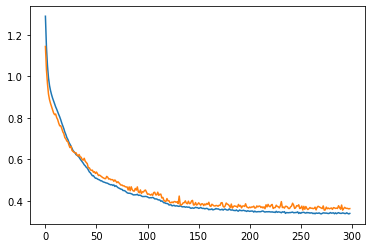

In [173]:
model_drop=Sequential()
model_drop.add(Dense(units=15, activation='tanh', input_shape=(12,), kernel_regularizer=regularizers.l2(0.045)))
model.add(Dropout(0.2))
model_drop.add(Dense(units=12, activation='tanh'))
model_drop.add(Dense(units=1))
model_drop.summary()

model_drop.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_drop=model_drop.fit(X_soap_red, y_soap, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_drop.history['loss'][1:])
plt.plot(Hist_drop.history['val_loss'][1:])

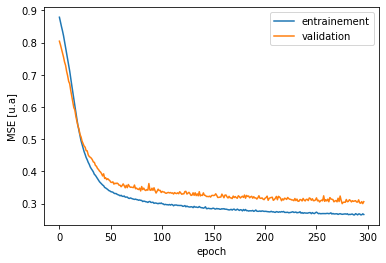

0.2998196482658386


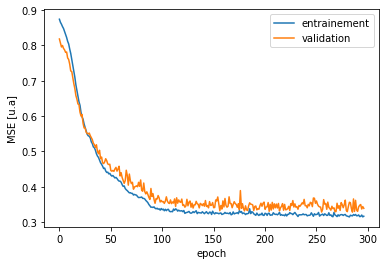

0.3277217745780945


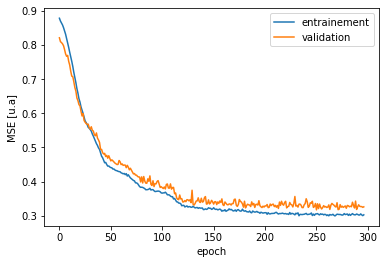

0.3171394467353821


In [179]:
plt.plot(Hist.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()
print(np.min(Hist.history['val_mean_squared_error'][3:]))

plt.plot(Hist_reg.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist_reg.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()

print(np.min(Hist_reg.history['val_mean_squared_error'][3:]))

plt.plot(Hist_drop.history['mean_squared_error'][3:],label="entrainement")
plt.plot(Hist_drop.history['val_mean_squared_error'][3:],label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE [u.a]")
plt.show()
print(np.min(Hist_drop.history['val_mean_squared_error'][3:]))


79/79 [==============================] - 0s 1ms/step
0.30963207300280876


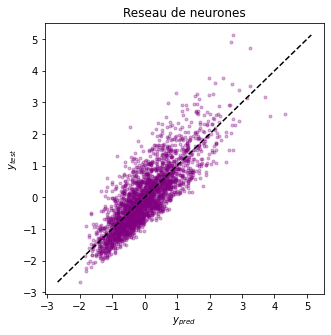

79/79 [==============================] - 0s 890us/step
0.4972052626515637


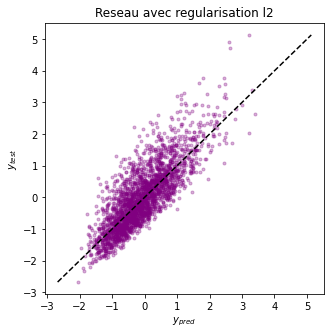

79/79 [==============================] - 0s 1ms/step
0.4912122133433323


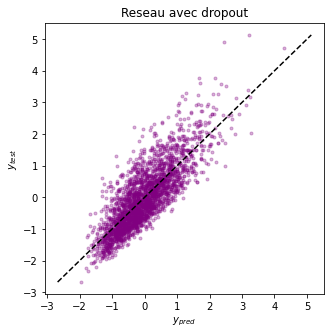

In [175]:
y_pred_test=model.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_test))))
      
fig=plt.figure(figsize=(5,5))
y_pred_test_krr_PIV=krrPIV.predict(X_test_PIV)
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau de neurones")
plt.show()

y_pred_test=model_reg.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_pred))))

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau avec regularisation l2")
plt.show()

y_pred_test=model_drop.predict(X_test_soap_red)
print((np.mean(np.square(y_pred_test- y_pred))))

fig=plt.figure(figsize=(5,5))
plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.3)
plt.xlabel('$y_{pred}$')
plt.ylabel('$y_{test}$')
plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_test), np.max(y_test)], color='black', linestyle='--')
plt.title("Reseau avec dropout")
plt.show()

In [200]:
y_pred_test_krr_soap=krrsoap.predict(X_test_soap_red)

y_pred_test=model.predict(X_test_soap_red)


79/79 [==============================] - 0s 884us/step


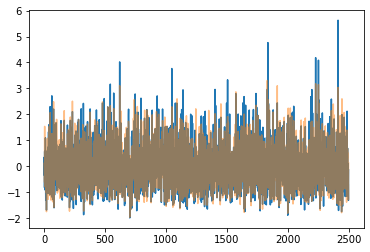

In [204]:
plt.plot(y_pred_test_krr_soap)
plt.plot(y_pred_test,alpha=0.5)

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : -0.011150927734375  +-  0.8818712881428635
E moyen : 1.1368683772161604e-17  +-  1.0


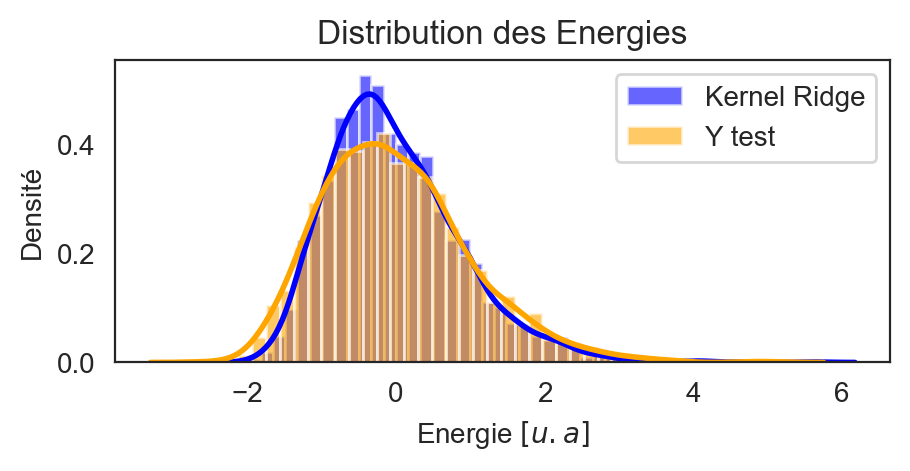

C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zacharie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


E moyen : 0.0063326093  +-  0.8134304
E moyen : 1.1368683772161604e-17  +-  1.0


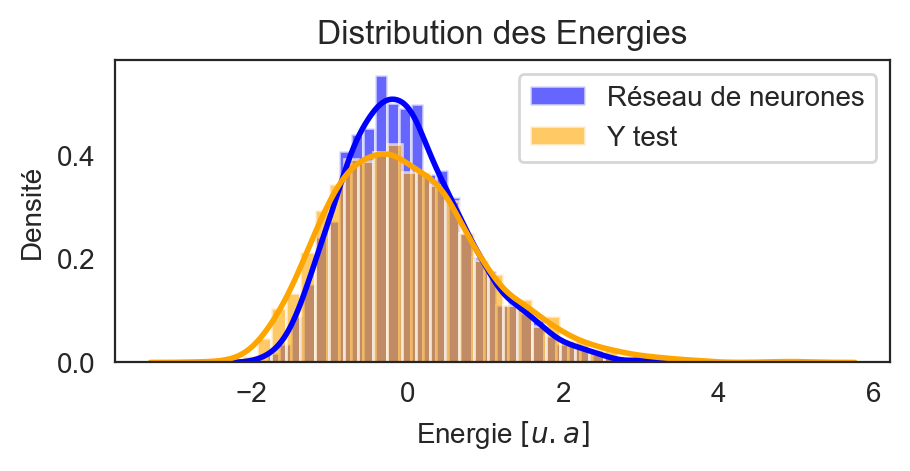

In [238]:
import seaborn as sns
sns.set_style("white")


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(y_pred_test_krr_soap), color="blue", **kwargs,label="Kernel Ridge")
print("E moyen :",y_pred_test_krr_soap.mean()," +- ",y_pred_test_krr_soap.std())
sns.distplot(pd.DataFrame(y_test), color="orange", **kwargs,label="Y test")
print("E moyen :",y_test.mean()," +- ",y_test.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()
plt.figure(figsize=(5,2), dpi= 200)

# plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(y_pred_test), color="blue", **kwargs,label="Réseau de neurones")
print("E moyen :",y_pred_test.mean()," +- ",y_pred_test.std())
sns.distplot(pd.DataFrame(y_test), color="orange", **kwargs,label="Y test")
print("E moyen :",y_test.mean()," +- ",y_test.std())

plt.legend()
plt.xlabel(r'Energie $[u.a]$')
plt.ylabel("Densité")

plt.title("Distribution des Energies")
plt.show()


In [178]:
def generate_xyz(positions, filename):
  # Open the file for writing
  with open(filename, 'w') as f:
    # Write the number of atoms to the file
    f.write(str(len(positions)) + '\n')
    f.write('\n')
    
    # Loop over the atomic positions
    for pos in positions:
      # Write the atomic symbol and coordinates to the file
        if(pos[0]==0.):
            f.write('O ' + ' '.join(str(x) for x in pos[1:4]) + '\n')
        if(pos[0]==1.):
            f.write('H ' + ' '.join(str(x) for x in pos[1:4]) + '\n')
            
class Monte_Carlo:
    def __init__(self, dataset,model,yscaler,temp,E_min):
        self.model=model
        self.dataset=dataset
        self.yyscaler=yscaler
        self.E_min=E_min
        self.E_temp=temp*Boltzmann/eV
        O1 =self.dataset[:,0,1:4]
        O2 =self.dataset[:,1,1:4]
        H  =self.dataset[:,2,1:4]
        H11=self.dataset[:,5,1:4]
        H12=self.dataset[:,6,1:4]
        H21=self.dataset[:,3,1:4]
        H22=self.dataset[:,4,1:4]
        H_O1       = O1-H
        H_O2       = O2-H
        O1_H11     = H11-O1
        O1_H12     = H12-O1
        O2_H21     = H21-O2
        O2_H22     = H22-O2
        
        self.H_O1_std       = 0.3*(O1-H).std()
        self.H_O2_std       = 0.3*(O2-H).std()
        self.O1_H11_std     = 0.3*(H11-O1).std()
        self.O1_H12_std     = 0.3*(H12-O1).std()
        self.O2_H21_std     = 0.3*(H21-O2).std()
        self.O2_H22_std     = 0.3*(H22-O2).std()
        self.O1_H_O2_std    = 0.3*(vg.angle(H_O1,H_O2)).std()
        self.H22_O2_H21_std = 0.3*(vg.angle(O2_H21,O2_H22)).std()
        self.H12_O1_H11_std = 0.3*(vg.angle(O1_H11,O1_H12)).std()
        

    def create_config(self,config):
        O1 =config[0,1:4]
        O2 =config[1,1:4]
        H  =config[2,1:4]
        H21=config[3,1:4]
        H22=config[4,1:4]
        H11=config[5,1:4]
        H12=config[6,1:4]
        
        H_O1       = O1-H
        H_O2       = O2-H
        O1_H11     = H11-O1
        O1_H12     = H12-O1
        O2_H21     = H21-O2
        O2_H22     = H22-O2
        O1_H_O2    = vg.angle(H_O1,H_O2)
        H22_O2_H21 = vg.angle(O2_H21,O2_H22)
        H12_O1_H11 = vg.angle(O1_H11,O1_H12)
        
        d_H_O1       = np.random.normal(loc=0, scale=self.H_O1_std      )
        d_H_O2       = np.random.normal(loc=0, scale=self.H_O2_std      )
        d_O1_H11     = np.random.normal(loc=0, scale=self.O1_H11_std    )
        d_O1_H12     = np.random.normal(loc=0, scale=self.O1_H12_std    )
        d_O2_H21     = np.random.normal(loc=0, scale=self.O2_H21_std    )
        d_O2_H22     = np.random.normal(loc=0, scale=self.O2_H22_std    )
        d_O1_H_O2    = np.random.normal(loc=0, scale=self.O1_H_O2_std   )
        d_H22_O2_H21 = np.random.normal(loc=0, scale=self.H22_O2_H21_std)
        d_H12_O1_H11 = np.random.normal(loc=0, scale=self.H12_O1_H11_std)
        new_H  = H
        r,t,p  = cartesian_to_polar_3d(H_O1)
        new_O1 = new_H + polar_to_cartesian_3d(r+d_H_O1,t+d_O1_H_O2/4,p+d_O1_H_O2/4)
        r,t,p  = cartesian_to_polar_3d(H_O2)
        new_O2 = new_H + polar_to_cartesian_3d(r+d_H_O2,t+d_O1_H_O2/4,p+d_O1_H_O2/4)
        r,t,p  = cartesian_to_polar_3d(O1_H11)
        new_H11= new_O1 + polar_to_cartesian_3d(r+d_O1_H11,t+d_H12_O1_H11/4,p+d_H12_O1_H11/4)
        r,t,p  = cartesian_to_polar_3d(O1_H12)
        new_H12= new_O1 + polar_to_cartesian_3d(r+d_O1_H12,t+d_H12_O1_H11/4,p+d_H12_O1_H11/4)
        r,t,p  = cartesian_to_polar_3d(O2_H21)
        new_H21= new_O2 + polar_to_cartesian_3d(r+d_O2_H21,t+d_H22_O2_H21/4,p+d_H22_O2_H21/4)
        r,t,p  = cartesian_to_polar_3d(O2_H22)
        new_H22= new_O2 + polar_to_cartesian_3d(r+d_O2_H22,t+d_H22_O2_H21/4,p+d_H22_O2_H21/4)
        new_config=np.copy(config)
        new_config[0,1:4]=new_O1 
        new_config[1,1:4]=new_O2 
        new_config[2,1:4]=new_H  
        new_config[3,1:4]=new_H21
        new_config[4,1:4]=new_H22
        new_config[5,1:4]=new_H11
        new_config[6,1:4]=new_H12
        return new_config
    
    def GetEnergy(self,config):
        generate_xyz(config, "a.xyz")
        Soap_pca,pca=SOAP_Vectors("a.xyz", output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pca_d=12)
        y_pred=self.model.predict(Soap_pca)
        E_pred=self.yscaler.inverse_transform(y_pred)
        return E_pred
        
    
    def get_proba(self,E_last,E_new):
        return np.exp((E_last-E_new)/(self.E_temp))
    
    def run_mcmc(self,config_init,N_config):
        dataset_gen=[]
        E_last=self.GetEnergy(config_init)
        new_config=config_init
        dataset_gen.append(new_config)
        for i in range(N_config):
            new_config=self.create_config(new_config)
            E_pred=self.GetEnergy(new_config)
            if (E_pred <= E_last ):
                if (E_pred >= E_min):
                    dataset_gen.append(new_config)
                else :
                    i=i-1
            else :
                print(get_proba(E_last,E_pred))
                i=i-1
        return(np.array(dataset_gen))


def cartesian_to_polar_3d(vector):
  # Convert the input vector to a NumPy array
  v = np.array(vector)
  
  # Calculate the polar coordinates
  r = np.linalg.norm(v)
  theta = np.arccos(v[2] / r)
  phi = np.arctan2(v[1], v[0])
  
  # Return the polar coordinates
  return (r, theta, phi)

def polar_to_cartesian_3d(r, theta, phi):

  
  # Calculate the Cartesian coordinates
  x = r * np.sin(theta) * np.cos(phi)
  y = r * np.sin(theta) * np.sin(phi)
  z = r * np.cos(theta)
  
  # Return the Cartesian coordinates
  return (x, y, z)



#         new_H=np.array([0,0,0])
#         new_O1=d_H_O1
#         new_O2=d_H_O2
#         new_H11=
#         new_H12=
#         new_H21=
#         new_H22=
MC=Monte_Carlo(dataset,model=model,yscaler=yscaler,temp=100,E_min=energies.min())


In [179]:
MC.run_mcmc(dataset[0],100)

loaded xyz file: a.xyz, with 1 frames and elements: [1 8]


ValueError: n_components=12 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'

array([[ 0.00000000e+00,  2.24643327e+00,  1.21709100e-02,
         8.47437000e-03],
       [ 0.00000000e+00, -2.25776180e+00,  1.15926000e-03,
         2.68762000e-03],
       [ 1.00000000e+00,  7.90166000e-03, -1.38440000e-03,
         1.29170760e-01],
       [ 1.00000000e+00, -3.01260594e+00,  1.47988102e+00,
        -7.37079700e-01],
       [ 1.00000000e+00, -3.20407528e+00, -4.70426980e-01,
         1.48716647e+00],
       [ 1.00000000e+00,  2.99892402e+00, -1.48736113e+00,
        -7.45110910e-01],
       [ 1.00000000e+00,  3.20703656e+00,  4.59307860e-01,
         1.50818372e+00]])

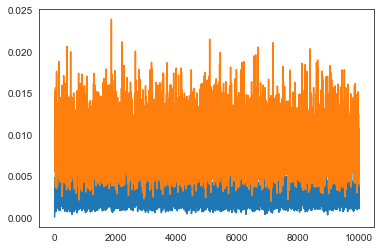

In [168]:
Boltzmann
# plt.plot(output[5])
plt.plot(output[4])
plt.plot(output[7]*Boltzmann/eV)

In [169]:
eV

1.602176634e-19

loaded xyz file: a.xyz, with 1 frames and elements: [1 8]


ValueError: n_components=12 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'